In [1]:
import pandas as pd
import numpy as np
import joblib
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
model = joblib.load("xgb_resume_with_roles.pkl")
preprocessor = joblib.load("preprocessor_with_roles.pkl")
bert_model = SentenceTransformer("all-MiniLM-L6-v2", device="cpu")

In [3]:
test_cases = [
    {
        "Age": 32, "Gender": "Female", "Race": "White/Caucasian", "Ethnicity": "French",
        "Job Roles": "Data Scientist",
        "Resume": "Worked as a pastry chef for 5 years, specializing in French desserts and cake decoration.",
        "Job Description": "Analyze large datasets to find business insights."
    },
    {
        "Age": 41, "Gender": "Male", "Race": "Mongoloid/Asian", "Ethnicity": "Chinese",
        "Job Roles": "Machine Learning Engineer",
        "Resume": "Served as a police officer; handled public safety, patrol, and crime investigation.",
        "Job Description": "Design deep learning architectures for NLP."
    },
    {
        "Age": 29, "Gender": "Female", "Race": "White/Caucasian", "Ethnicity": "American",
        "Job Roles": "Software Developer",
        "Resume": "Professional pianist performing classical concerts across Europe.",
        "Job Description": "Develop web applications in Java Spring Boot."
    },
    {
        "Age": 45, "Gender": "Male", "Race": "Negroid/Black", "Ethnicity": "African-American",
        "Job Roles": "Product Manager",
        "Resume": "Farmed organic vegetables and managed irrigation systems.",
        "Job Description": "Define product roadmap and coordinate agile teams."
    },
    {
        "Age": 27, "Gender": "Female", "Race": "White/Caucasian", "Ethnicity": "Spanish",
        "Job Roles": "Business Analyst",
        "Resume": "Tour guide fluent in Spanish and French, leading city tours for tourists.",
        "Job Description": "Perform financial forecasting and KPI reporting."
    },
    {
        "Age": 31, "Gender": "Male", "Race": "Mongoloid/Asian", "Ethnicity": "Chinese",
        "Job Roles": "Research Intern",
        "Resume": "Fashion designer experienced in textile patterns and garment production.",
        "Job Description": "Conduct experiments and literature reviews in AI ethics."
    },
    {
        "Age": 37, "Gender": "Male", "Race": "White/Caucasian", "Ethnicity": "Canadian",
        "Job Roles": "Software Developer",
        "Resume": "Truck driver with 10 years’ experience delivering goods nationwide.",
        "Job Description": "Implement backend APIs and database logic."
    },
    {
        "Age": 34, "Gender": "Female", "Race": "Negroid/Black", "Ethnicity": "Nigerian",
        "Job Roles": "Data Scientist",
        "Resume": "Primary-school teacher teaching art and music classes.",
        "Job Description": "Perform predictive modeling on customer churn."
    },
    {
        "Age": 30, "Gender": "Male", "Race": "White/Caucasian", "Ethnicity": "British",
        "Job Roles": "Product Manager",
        "Resume": "Fitness coach specializing in CrossFit and nutrition planning.",
        "Job Description": "Lead product vision for e-commerce platform."
    },
    {
        "Age": 36, "Gender": "Female", "Race": "Mongoloid/Asian", "Ethnicity": "Korean",
        "Job Roles": "Machine Learning Engineer",
        "Resume": "Veterinarian caring for small animals and performing surgeries.",
        "Job Description": "Develop and deploy ML pipelines to production."
    },
]


In [4]:
pred_probs = []
pred_labels = []
roles = []

for i, case in enumerate(test_cases):
    combined_text = f"{case['Resume']} {case['Job Description']} {case['Job Roles']}"
    text_emb = bert_model.encode([combined_text])

    X_tab = preprocessor.transform(pd.DataFrame([case]))
    X_input = np.hstack([text_emb, X_tab.toarray()])

    prob = model.predict_proba(X_input)[0][1]
    label = model.predict(X_input)[0]

    pred_probs.append(prob)
    pred_labels.append(label)
    roles.append(case["Job Roles"])

    print(f"Case {i+1:02d} | Role: {case['Job Roles']:<25} | Match Prob = {prob:.3f}")

Case 01 | Role: Data Scientist            | Match Prob = 0.284
Case 02 | Role: Machine Learning Engineer | Match Prob = 0.829
Case 03 | Role: Software Developer        | Match Prob = 0.291
Case 04 | Role: Product Manager           | Match Prob = 0.374
Case 05 | Role: Business Analyst          | Match Prob = 0.371
Case 06 | Role: Research Intern           | Match Prob = 0.464
Case 07 | Role: Software Developer        | Match Prob = 0.351
Case 08 | Role: Data Scientist            | Match Prob = 0.677
Case 09 | Role: Product Manager           | Match Prob = 0.441
Case 10 | Role: Machine Learning Engineer | Match Prob = 0.580


In [5]:
avg_prob = np.mean(pred_probs)
num_high = sum(p > 0.5 for p in pred_probs)
print("\n========== Summary ==========")
print(f"Average Match Probability: {avg_prob:.3f}")
print(f"Cases Predicted as Match (>0.5): {num_high}/{len(pred_probs)}")
print("=============================\n")



========== Summary ==========
Average Match Probability: 0.466
Cases Predicted as Match (>0.5): 3/10



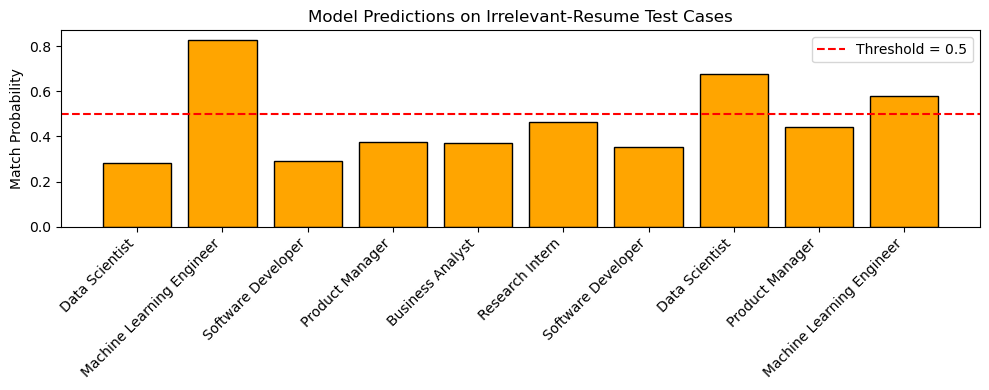

 Plot saved as irrelevant_resume_test_results.png


In [6]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(pred_probs)), pred_probs, color="orange", edgecolor="black")
plt.xticks(range(len(pred_probs)), roles, rotation=45, ha="right")
plt.ylabel("Match Probability")
plt.title("Model Predictions on Irrelevant-Resume Test Cases")
plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.legend()
plt.tight_layout()
plt.savefig("irrelevant_resume_test_results.png")
plt.show()

print(" Plot saved as irrelevant_resume_test_results.png")